## 1) Automatically classify the bean species A using dataset containing over 13k samples of dry beans geometric features.

Data Set Information:

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.


Attribute Information:

* 1) Area (A): The area of a bean zone and the number of pixels within its boundaries.
* 2) Perimeter (P): Bean circumference is defined as the length of its border.
* 3) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
* 4) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
* 5) Aspect ratio (K): Defines the relationship between L and l.
* 6) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
* 7) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
* 8) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
* 9) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
* 10) Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
* 11) Roundness (R): Calculated with the following formula: (4piA)/(P^2)
* 12) Compactness (CO): Measures the roundness of an object: Ed/L
* 13) ShapeFactor1 (SF1)
* 14) ShapeFactor2 (SF2)
* 15) ShapeFactor3 (SF3)
* 16) ShapeFactor4 (SF4)
* 17) Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

## 2) Classification of dry beans

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly



In [1]:
'''
Import Libraries

'''
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import backend
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
import tensorflow as tf
from zipfile import ZipFile
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
'''
This function is used to identify the outliers for Variable
'''

def identify_outliers(data, featureName):
    mean = np.mean(data[featureName])
    stddev = np.std(data[featureName])
    indices = []
    for index,value in data[featureName].iteritems():
        z_score = (value-mean)/stddev
        if abs(z_score) > 3:
            indices.append(index)
    return indices


'''
This function is used to generate the heat map for the data. 
This Function generate the Correlation Matrix between the Variables and then plots as Heat Map.
'''

def show_heat_map(data):
    correlation_matrix = data.corr()
    #To mask out the upper triangle
    plt.figure(figsize=(20,10))
    mask = np.zeros_like(correlation_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(data.corr(),mask=mask,annot=True)
    
    
    
def histogram_boxplot(feature, figsize=(10,5), bins = None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet')
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')
    
    

    
def box_plt(feature, variable):
    plt.figure(figsize=(15,6)) 
    
    sns.boxplot(feature, x='Class',y=variable, data=data,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^",
                    "markerfacecolor":"white",
                    "markeredgecolor":"black",
                    "markersize":"8"});
       

def download_file(url, save_folder):

    local_filename = url.split('/')[-1]  
    if os.path.isfile(os.path.join(save_folder, local_filename)): return os.path.join(save_folder, local_filename)
    r = requests.get(url, stream=True)
    with open(os.path.join(save_folder, local_filename), 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
    return os.path.join(save_folder, local_filename)


In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"


drybeans = download_file(data_url, os.getcwd())

print(drybeans)

zipfilename = "{}\\DryBeanDataset.zip".format(os.getcwd())


# loading the temp.zip and creating a zip object
with ZipFile(zipfilename, 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(path=os.getcwd())
    

    
dataunzipfilename = "{}\\DryBeanDataset\\Dry_Bean_Dataset.xlsx".format(os.getcwd())


C:\Users\Bablu\Documents\TFCert\venv\Scripts\DryBeanDataset.zip


## 2.2 Code for converting the above downloaded data into a form suitable for DL 

In [3]:
'''
Read Downloaded data as Pandas Dataframe
'''
data = pd.read_excel(dataunzipfilename)
data.shape

'''
Review the Data columns values and Statsistcs like Max, Min, Count, Std Deviation, etc. of input data file read as Pandad Dateframe
'''
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## 2.3 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?




1.a) Number of Records : <B>13611</B>
1.b) Number of Columns : <B>17</B>

2) All the feature are <B>numerical</B>, The Label/Class is <B>categorical</B>

# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


## 3.1 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies

IF ANY

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


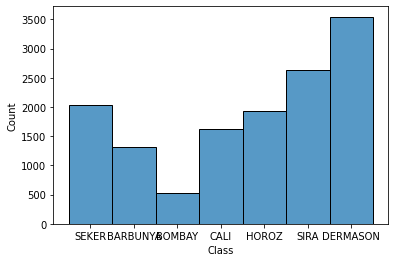

C:\Users\Bablu\Documents\TFCert\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bablu\Documents\TFCert\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bablu\AppData\Local\Temp/ipykernel_9960/2300856884.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warni

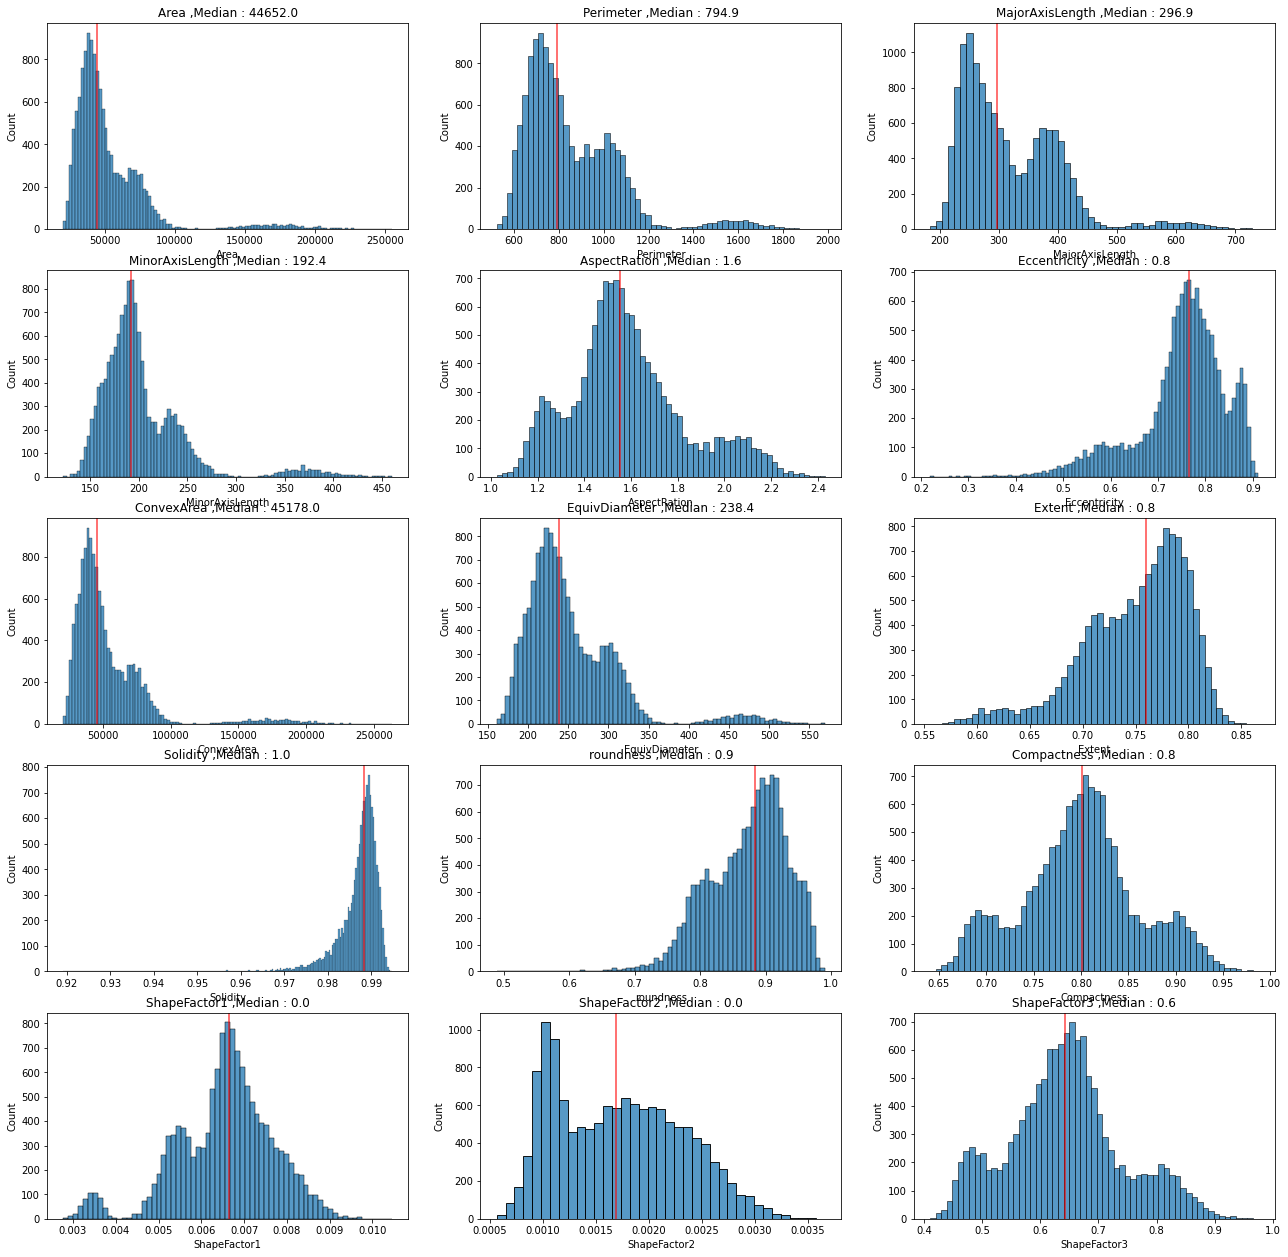

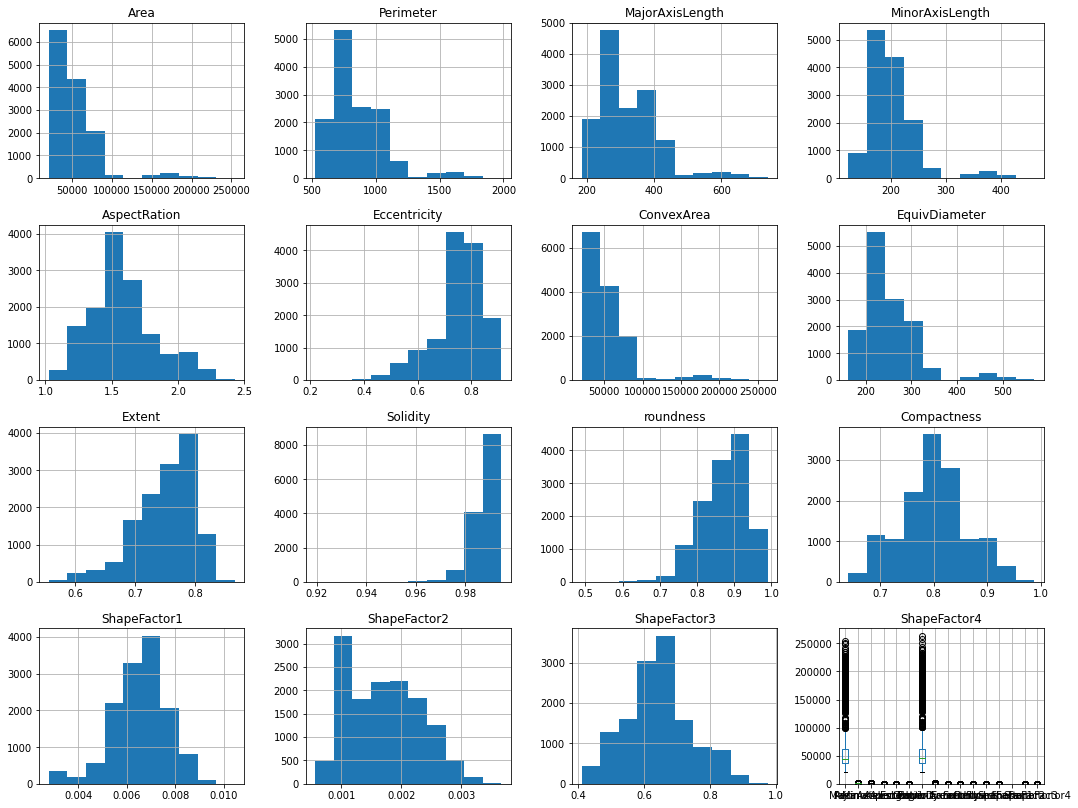

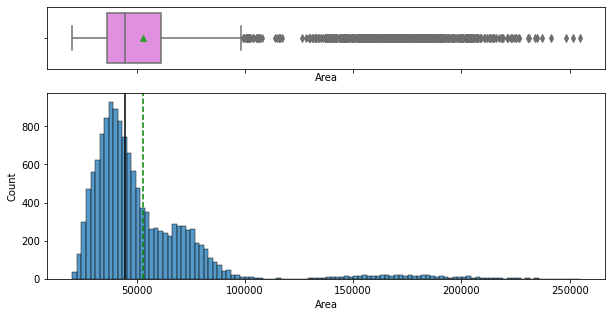

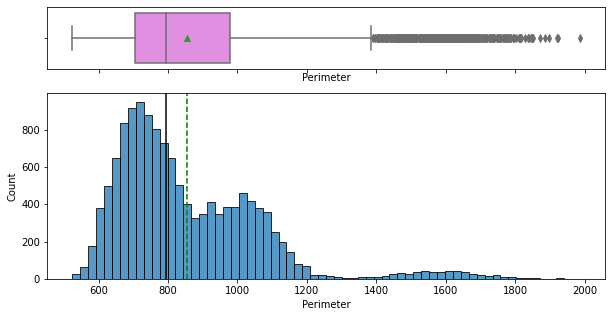

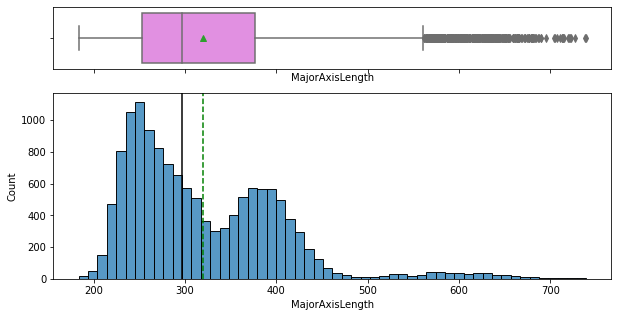

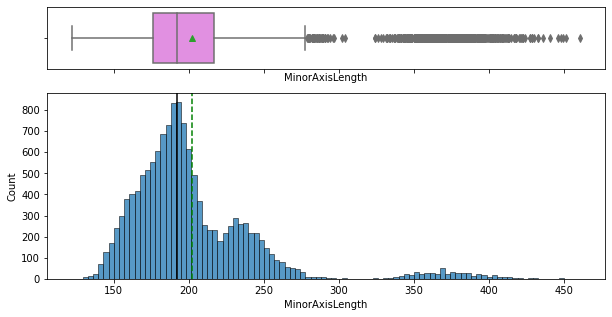

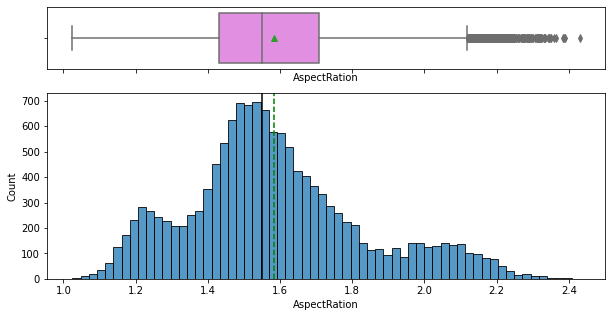

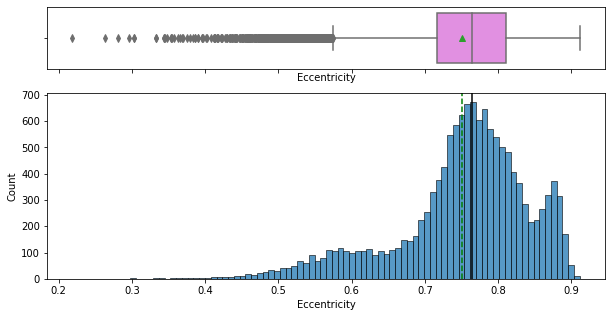

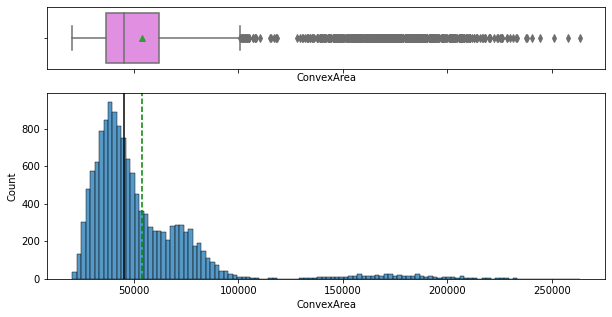

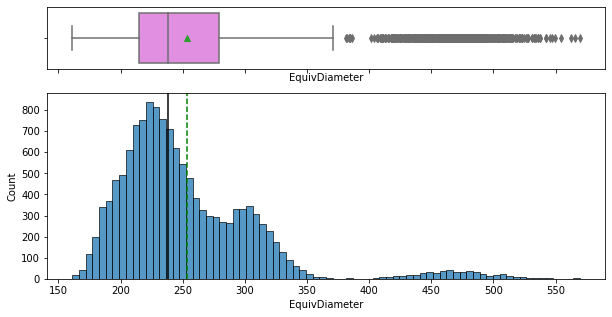

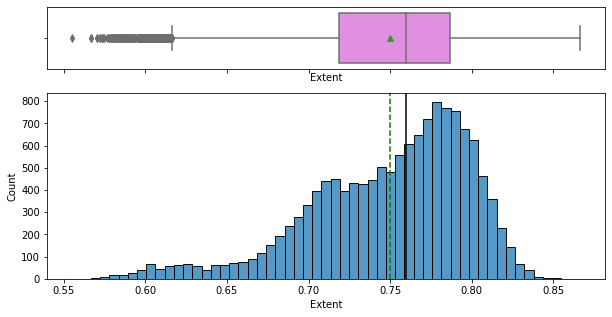

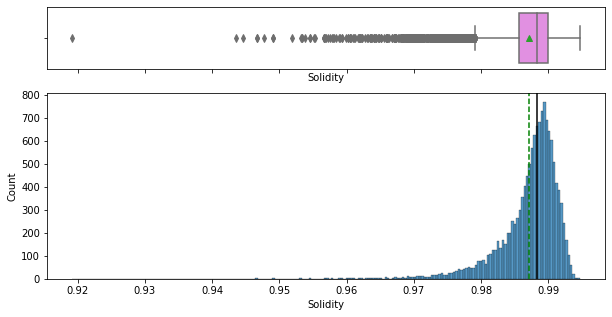

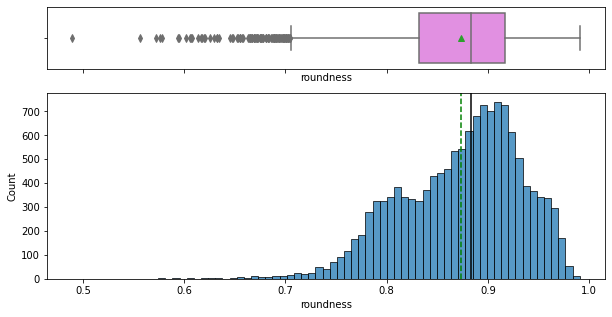

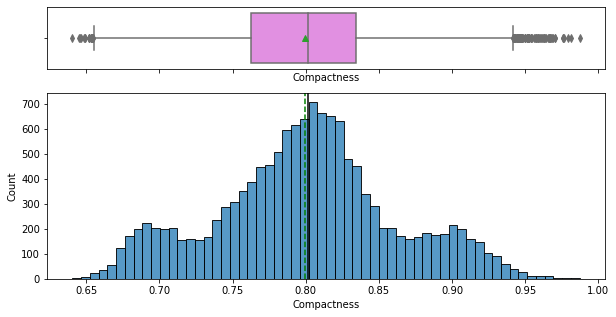

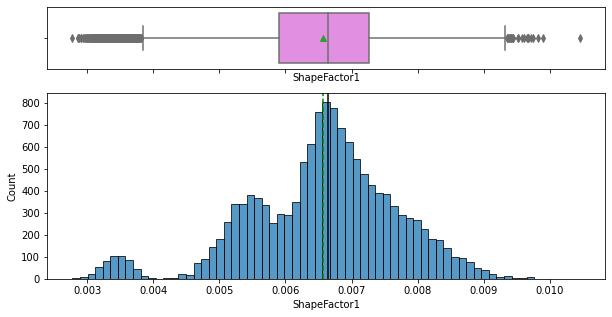

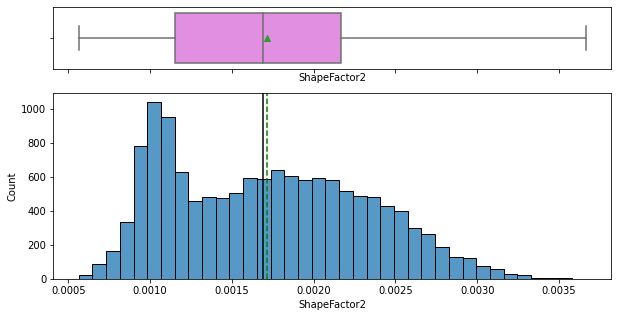

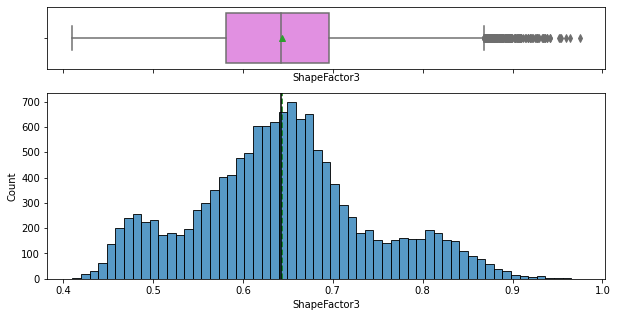

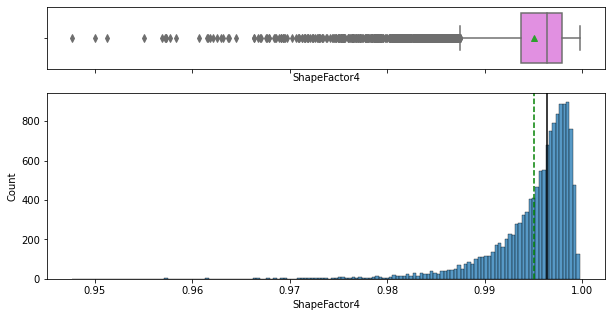

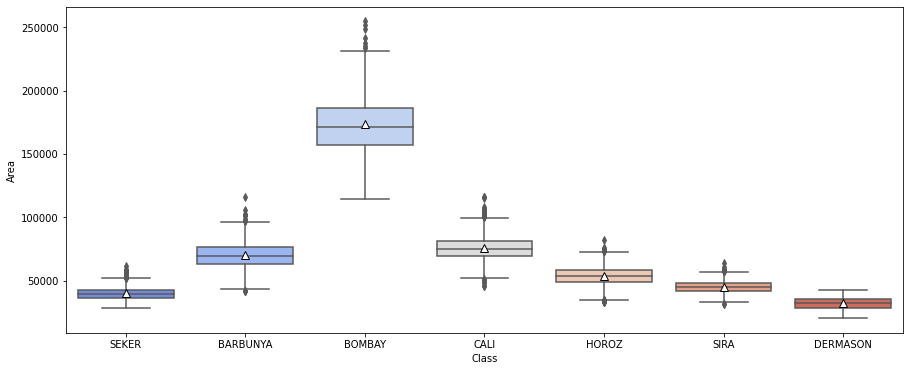

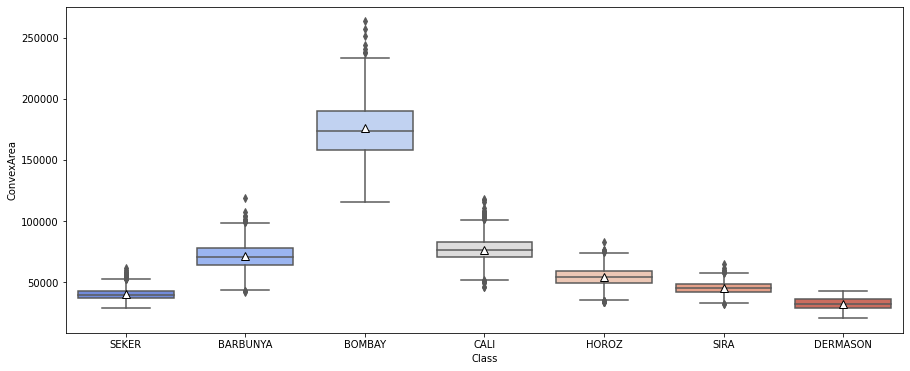

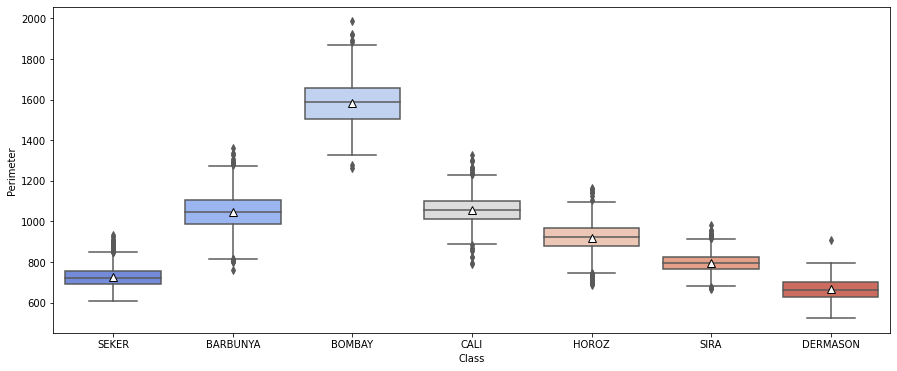

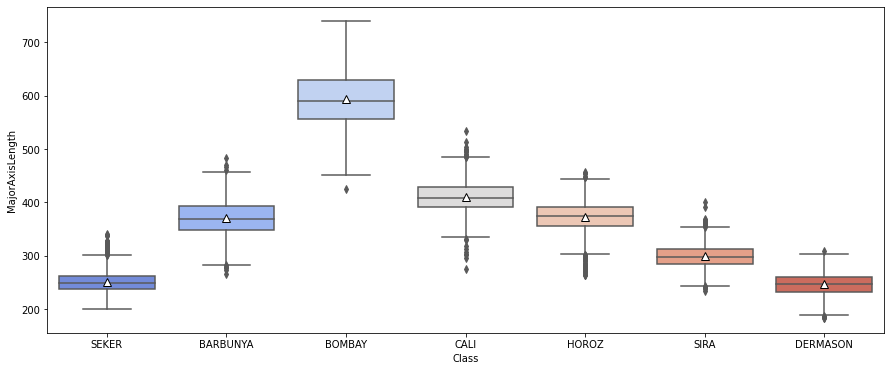

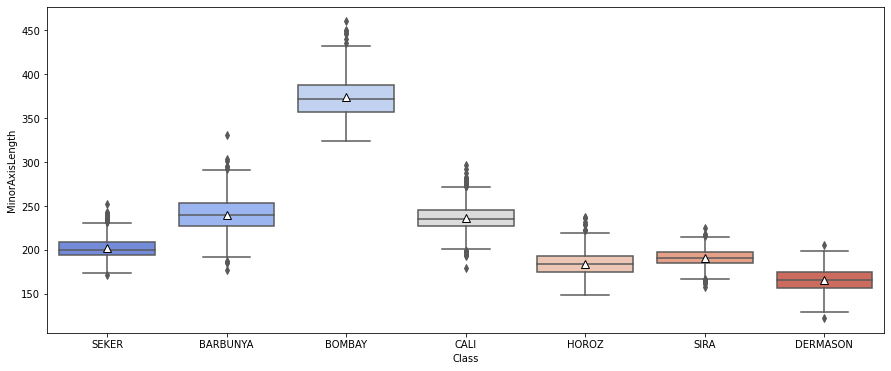

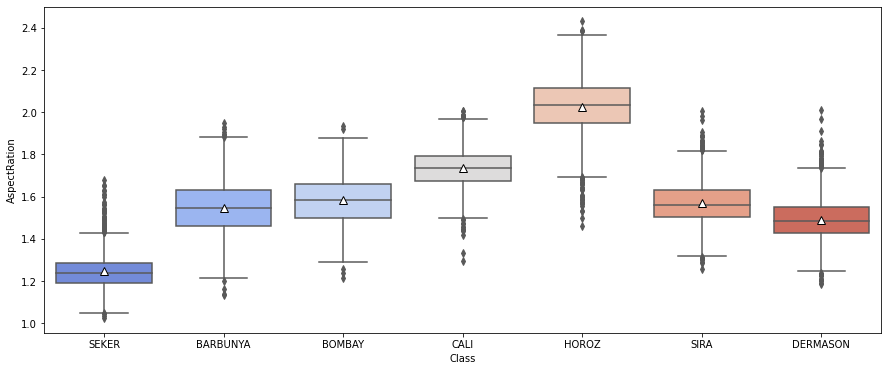

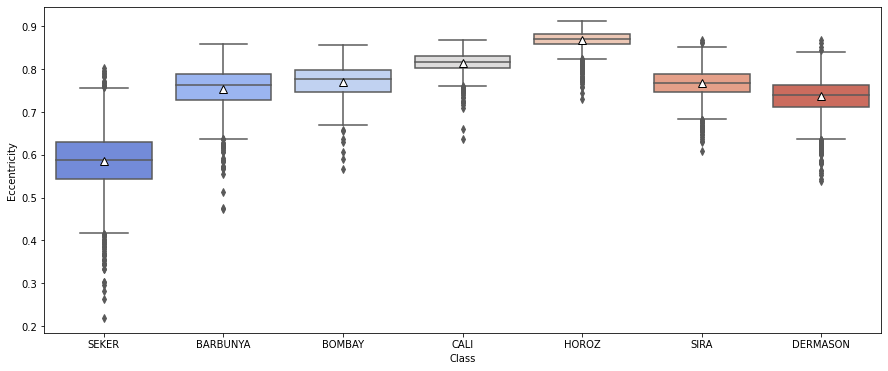

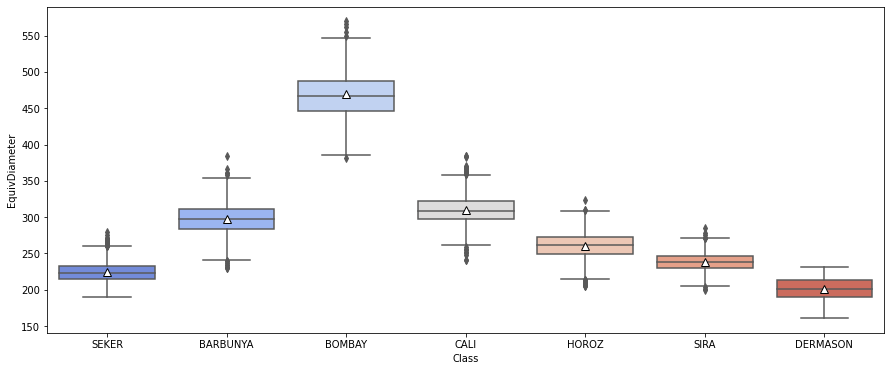

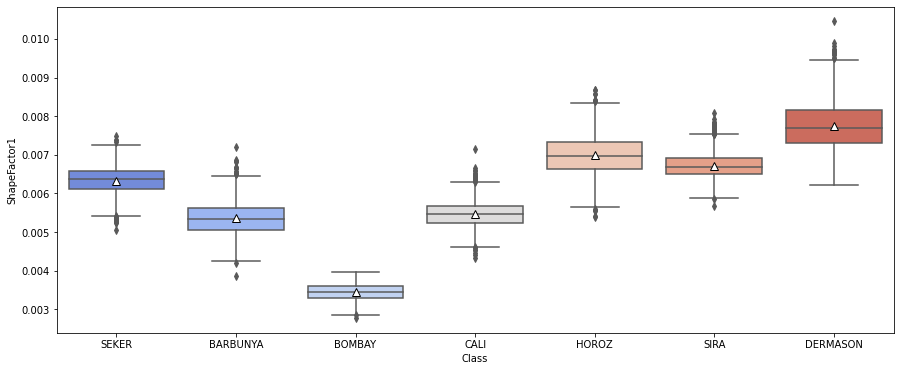

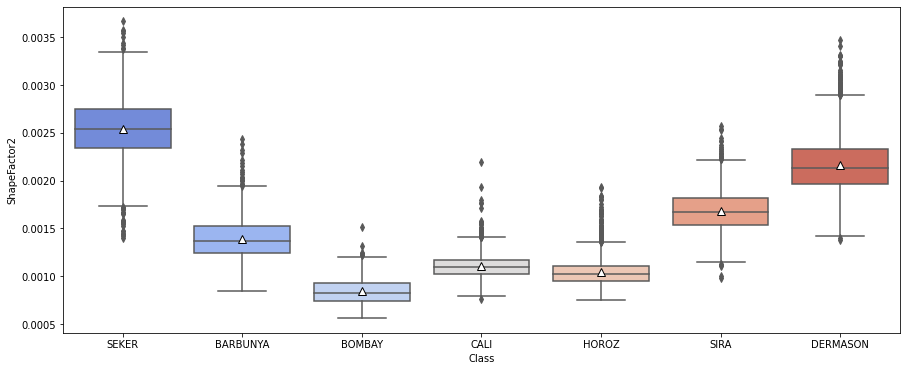

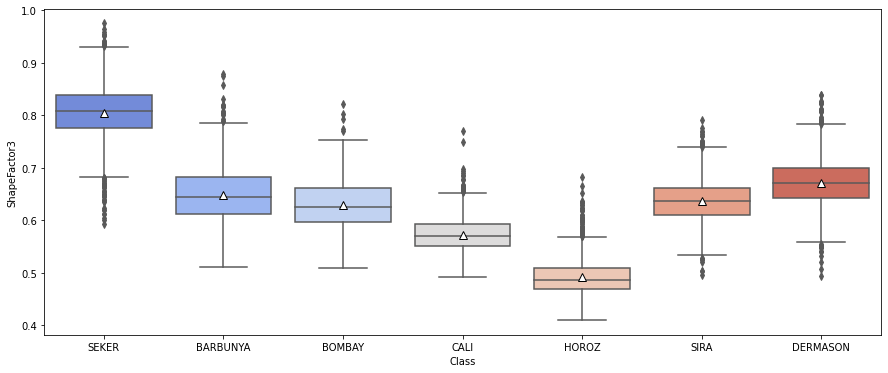

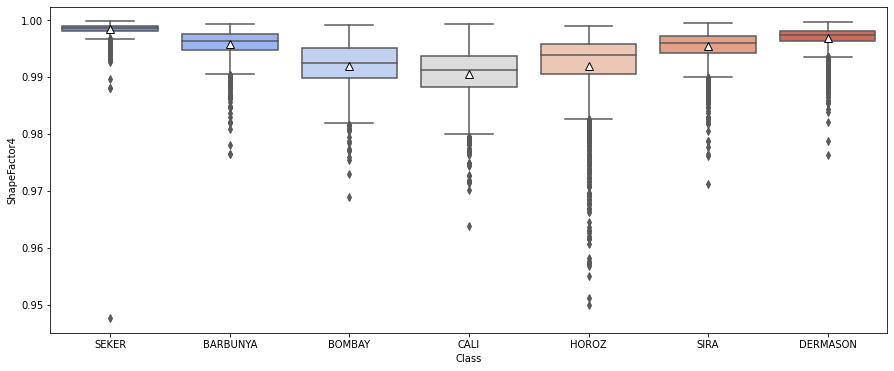

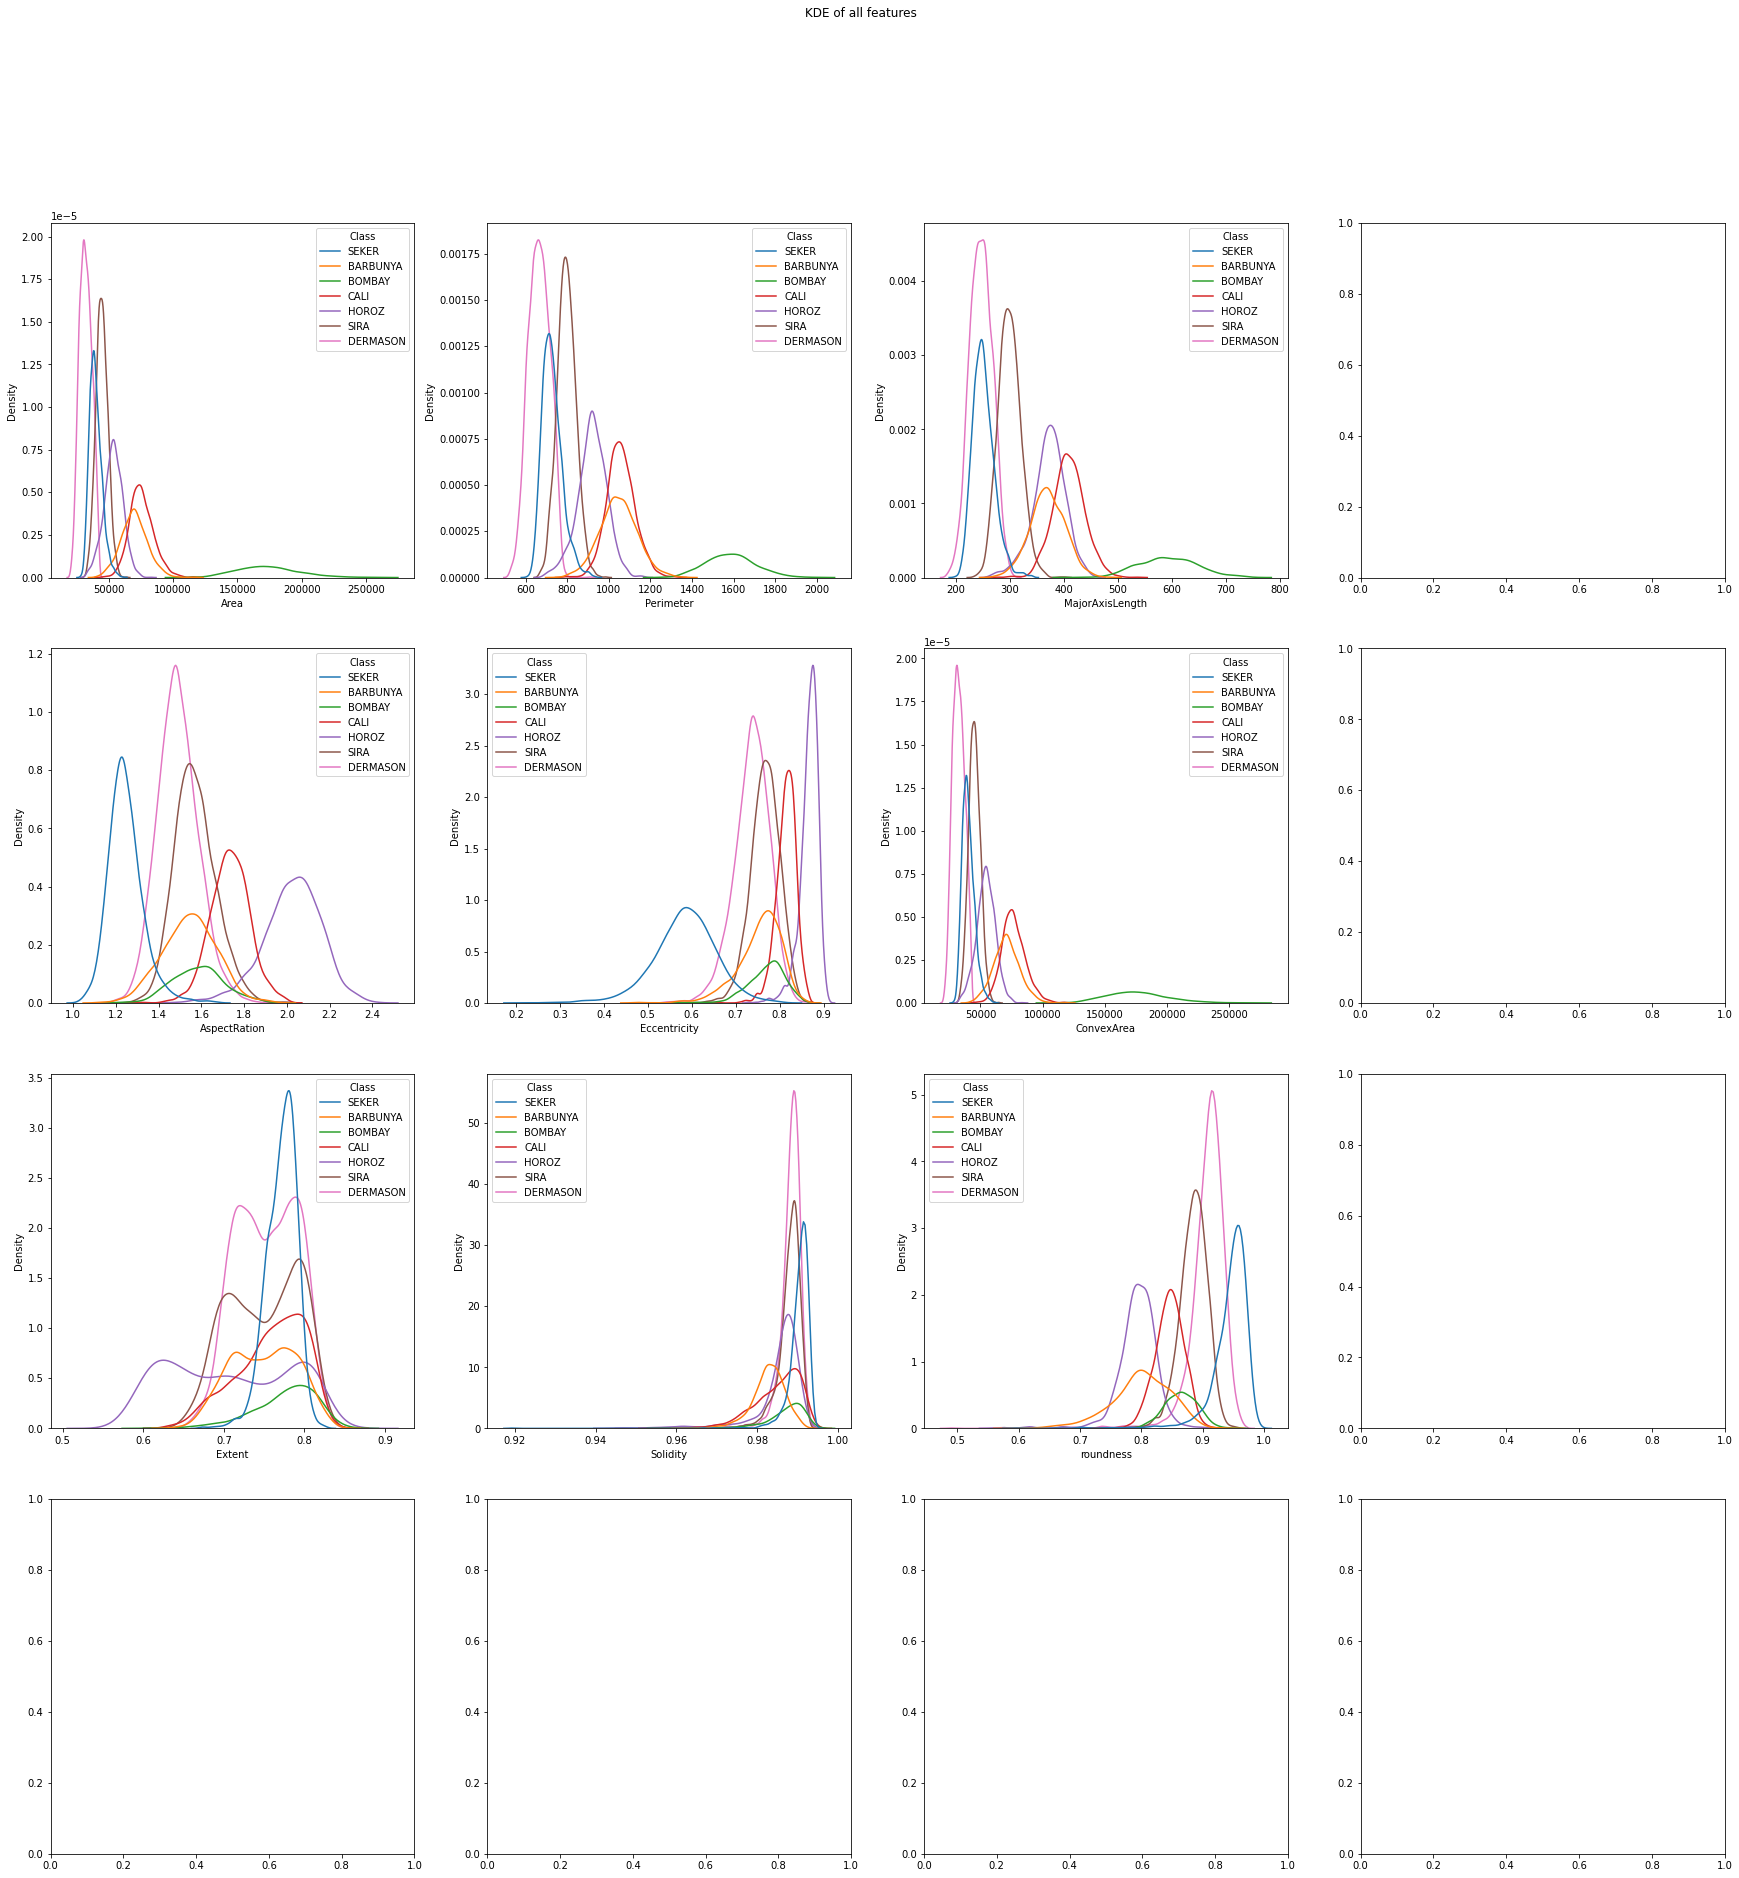

C:\Users\Bablu\AppData\Local\Temp/ipykernel_9960/2300856884.py:53: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_matrix, dtype=np.bool)


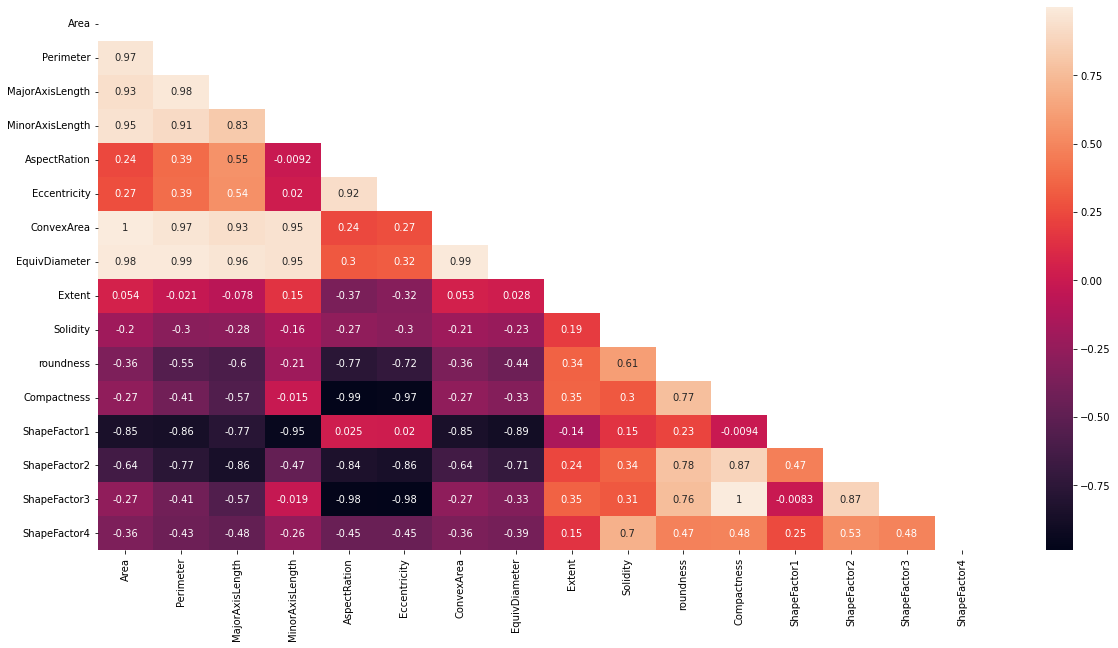

In [4]:
'''
Check for Null Data Values

'''

print(data.isna().sum())

'''
Excluding ID and target
'''
data_columns = data.iloc[:, 0:-1].columns.array 
data_columns

'''
Visualize the Count of Records per Class
'''
sns.histplot(data=data, x= 'Class')
plt.show()


'''
Replacing the Null values with Mode value
'''
data['MajorAxisLength'].fillna(data['MajorAxisLength'].mode()[0],inplace=True)
data['MinorAxisLength'].fillna(data['MinorAxisLength'].mode()[0],inplace=True)
data['AspectRation'].fillna(data['AspectRation'].mode()[0],inplace=True)
data['Eccentricity'].fillna(data['Eccentricity'].mode()[0],inplace=True)
data['Solidity'].fillna(data['Solidity'].mode()[0],inplace=True)
data['Compactness'].fillna(data['Compactness'].mode()[0],inplace=True)
data['ShapeFactor1'].fillna(data['ShapeFactor1'].mode()[0],inplace=True)
data['ShapeFactor2'].fillna(data['ShapeFactor2'].mode()[0],inplace=True)


fig, axes = plt.subplots(5, 3, figsize=(22, 22))
for i, axe in enumerate(axes.flatten()):
    sns.histplot(data[data_columns[i]], ax = axe)
    median = data[data_columns[i]].median()
    axe.set_title(data_columns[i] + f' ,Median : {median:0.1f}')
    axe.axvline(median, color ='red', lw=2, alpha = 0.55)
    
    
data.hist(figsize=(18,14))


data.boxplot(figsize=(18,10))


for col in data_columns:
    histogram_boxplot(data[col])
    
    
'''
Box Plot for Bi-Variate and Multi-Variate Data Analysis
'''

box_plt(data["Class"], data['Area'])
box_plt(data["Class"], data['ConvexArea'])
box_plt(data["Class"], data['Perimeter'])
box_plt(data["Class"], data['MajorAxisLength'])
box_plt(data["Class"], data['MinorAxisLength'])
box_plt(data["Class"], data['AspectRation'])
box_plt(data["Class"], data['Eccentricity'])
box_plt(data["Class"], data['EquivDiameter'])
box_plt(data["Class"], data['ShapeFactor1'])
box_plt(data["Class"], data['ShapeFactor2'])
box_plt(data["Class"], data['ShapeFactor3'])
box_plt(data["Class"], data['ShapeFactor4'])

'''
Visulaize feature distributions per class
'''

features_to_visulaize = data.iloc[:,:-1].columns.values.reshape(4,4)
fig, axes = plt.subplots(4, 4, figsize=(30, 30))
fig.suptitle('KDE of all features')

for i in range(3):
    for j in range(3):
        sns.kdeplot(ax=axes[i, j], data=data, x=features_to_visulaize[i,j], hue='Class')
plt.show()



'''
Plot Heat map to identify positive correlation
'''
show_heat_map(data)

In [5]:
'''
Dropping Coorelated Features/Attributes
'''
columns_to_drop  = ['Area','EquivDiameter','ShapeFactor3','Perimeter','AspectRation'
                   ,'MinorAxisLength','Compactness','MinorAxisLength']
data.drop(columns_to_drop,axis=1,inplace=True)

print("Columns List : {}".format(data.columns))


'''
We drop Duplicates from the dataset
'''

data = data.drop_duplicates()



Columns List : Index(['MajorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Solidity',
       'roundness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor4', 'Class'],
      dtype='object')


## 3.2 Normalize the data

In [6]:
'''
MinMax normalize all numeric columns
Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. The great difference in the scale of the numbers could cause problems when attempted to combine the values as features during modeling.
'''
cols = data.select_dtypes(np.number).columns
data[cols] = minmax_scale(data[cols])


## 3.3 Outlier Detection

In [7]:
'''
We identify the outliers and drops the records as these outliers impacts the model performance. 
Outliers badly affect mean and standard deviation of the dataset. 
These may give erroneous results, increase the error variance and reduces the power of statistical tests.
'''

'''
Identify the Outliers and Drop the Records
'''
ConvexArea_outliers=identify_outliers(data,'ConvexArea')
data.drop(ConvexArea_outliers,inplace=True)
print('Removed {} outliers from the dataset'.format(len(ConvexArea_outliers)))
data.shape


Removed 482 outliers from the dataset


(13061, 10)

## 3.4 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.



In [8]:
'''
Multiclass classification : Need to encode the target labels and transform them in a categorical form. The output variable contains Seven different string values.

When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to a matrix with a Boolean for each class value and whether a given instance has that class value or not.

This is called one-hot encoding or creating dummy variables from a categorical variable.
'''

data.head()
X = data.drop(['Class'], axis = 1)
X = np.array(X)
Y = np.array(data['Class'])
l_encode = LabelEncoder()
l_encode.fit(Y)
Y = l_encode.transform(Y)
Y = to_categorical(Y)

## 3.5 Split the data into training set and testing set

In [9]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.3, random_state = 0)

## 3.6 Report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used


<B>We drop Duplicates from the dataset</B>

data = data.drop_duplicates()


<B>To encode categorical data Encode target labels with value between 0 and n_classes-1</B>

dataDL=data

LE = LabelEncoder()

dataDL['code'] = LE.fit_transform(data['Class'])



<B>MinMax normalize</B> all numeric columns
Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. The great difference in the scale of the numbers could cause problems when attempted to combine the values as features during modeling.


cols = data.select_dtypes(np.number).columns
data[cols] = minmax_scale(data[cols])



<B>Multiclass classification</B> : Need to encode the target labels and transform them in a categorical form. The output variable contains Seven different string values.

When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to a matrix with a Boolean for each class value and whether a given instance has that class value or not.

This is called <B>one-hot encoding</B> or creating dummy variables from a categorical variable.




<B>'''Data Observation'''</B>

Area is right skewed bit lot of max outliers

Area has few extreme values

Perimeter is right-skewed 

Perimeter has lot of outliers 

Perimeter : : Few data points have significantly higher values

Major Axis Length is right-skewed data with max outliers

Major Axis Length : Few data points have significantly higher values

Minor Axis Length is right-skewed data with max outliers

Minor Axis Length : Few data points have significantly higher values

Eccentricity is left-skewed with minimum outliers

Eccentricity : Few data points have significantly lesser values

EquivDiameter is right-skewed data

Extent is left-skewed data

Compactness is normally distributed

Shapefactor 1 is normally distributed with min and max outliers

ShapeFactor 2 is normally distributed without any outliers

ShapeFactor 4 is extremely left skewed with minimum outliers

Comparing to ShapeFactor 3, 2, and 1 we can observe ShapeFactor 4 is extremely skewed

Most of the attributes are skewed

Some attributes having significantly higher or lower values

BOMBAY having higher Area, follwed by Cali and Barbunya. Least Area is for Dermason and Seker

Bombay having higher Perimeter, followed by Barbunya and Cali. Least Perimeter is for Dermason and Seker

Bombay having higher Major Axis Length followed by Calia and Barbunya, least Major Axis Length is for Dermason and Seker

Bombay having higher Minor Axis values, followed by Barbuya and Cali, least being Dermason

ShapeFactor 2 and 3 merely have the same trend

Some features have correlation = 1 with each other so we can safely drop one of them

	ConvexArea and Area
	ShapeFactor 3 and Compactness
    
Some feature have correlation almost equal to -1 (-0.99,-0.98) , we can also choose to drop one of them or take pca

	AscpectRatio and Compactness
	AscpectRatio and ShapeFactor 3
	MajorAxisLength and Perimeter
	Perimeter and Area
	EquivDiameter and Area
	EquivDiameter and Perimeter
	Eccentricity and ShapeFactor 3
    
    
    
Some feature are able to strongly identify some classes

ShapeFactor 1 of Bombay type is always less than 0.004 anything else is higher

Eccentricity is able to distinguish beans of type SEKER and of type HOROZ

Also some types have flat curve for specific features which means that we could not use this feature to identify them like the feature Extent with type HOROZ

# 4. Deep Neural Network Architecture



## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* 9 inputs ==> [18 hidden nodes] ==> 7 outputs
_________________________________________________________________

In [10]:
tf.keras.backend.clear_session()

neural_network_classifier=Sequential()
neural_network_classifier.add(Dense(9,input_dim=train_x.shape[1],activation = 'relu'))
neural_network_classifier.add(Dense(18,activation='relu'))
neural_network_classifier.add(Dense(7,activation='softmax'))


neural_network_classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 18)                180       
                                                                 
 dense_2 (Dense)             (None, 7)                 133       
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


## 4.2 Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Activation function used in each hidden layer
* Activation function used in the output layer
* Total number of trainable parameters 



Model: "sequential"

Number of Layers = 4 (Input = 1, Hidden = 1, Output = 1) 

Number of units in each layer = 

* 9 inputs ==> [18 hidden nodes] ==> 7 outputs

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   

=================================================================

 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 18)                180       
                                                                 
 dense_2 (Dense)             (None, 10)                190       
                                                                 
 dense_3 (Dense)             (None, 7)                 77        
                                                                 
=================================================================

Activation function used in each hidden layer
<B>
Input = Relu
Hidden 1 = Relu
Hidden 2 = Relu
Output = Softmax
</B>

Activation function used in the output layer
<B>
Output = Softmax
</B>

Total number of trainable parameters

Total params: <B>537</B>

Trainable params: <B>537</B>

Non-trainable params: <B>0</B>
________________________________


* Using more hidden neurons than required will add more complexity
* Adding more hidden layer was not improving the model performance
* Adding more hidden layer was increasing the training time
* As the problem statement is not so complex and do not have many features, so a simple model makes more sense

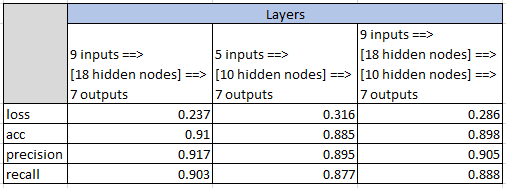


# 5. Training the model


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations



In [11]:
neural_network_classifier.compile(optimizer='Adam',loss='categorical_crossentropy', 
                                  metrics=['acc',tf.keras.metrics.Precision(),
                                           tf.keras.metrics.Recall(),
                                           tf.keras.metrics.TrueNegatives(),
                                           tf.keras.metrics.TruePositives(),
                                           tf.keras.metrics.FalseNegatives(),
                                           tf.keras.metrics.FalsePositives()])


## 5.2 Train the model

In [12]:
history=neural_network_classifier.fit(train_x,train_y,epochs=50,batch_size=32,validation_split=0.1)

Epoch 1/50
258/258 [==============================] - 6s 9ms/step - loss: 1.6612 - acc: 0.4313 - precision: 1.0000 - recall: 0.0019 - true_negatives: 49362.0000 - true_positives: 16.0000 - false_negatives: 8211.0000 - false_positives: 0.0000e+00 - val_loss: 1.2680 - val_acc: 0.6907 - val_precision: 1.0000 - val_recall: 0.0393 - val_true_negatives: 5490.0000 - val_true_positives: 36.0000 - val_false_negatives: 879.0000 - val_false_positives: 0.0000e+00
Epoch 2/50
258/258 [==============================] - 1s 5ms/step - loss: 0.9637 - acc: 0.7402 - precision: 0.9701 - recall: 0.2877 - true_negatives: 49289.0000 - true_positives: 2367.0000 - false_negatives: 5860.0000 - false_positives: 73.0000 - val_loss: 0.7477 - val_acc: 0.7934 - val_precision: 0.9353 - val_recall: 0.5213 - val_true_negatives: 5457.0000 - val_true_positives: 477.0000 - val_false_negatives: 438.0000 - val_false_positives: 33.0000
Epoch 3/50
258/258 [==============================] - 1s 5ms/step - loss: 0.6596 - acc: 0.8

258/258 [==============================] - 1s 5ms/step - loss: 0.2878 - acc: 0.8958 - precision: 0.9067 - recall: 0.8851 - true_negatives: 48613.0000 - true_positives: 7282.0000 - false_negatives: 945.0000 - false_positives: 749.0000 - val_loss: 0.2818 - val_acc: 0.8929 - val_precision: 0.8990 - val_recall: 0.8852 - val_true_negatives: 5399.0000 - val_true_positives: 810.0000 - val_false_negatives: 105.0000 - val_false_positives: 91.0000
Epoch 20/50
258/258 [==============================] - 1s 5ms/step - loss: 0.2838 - acc: 0.8966 - precision: 0.9055 - recall: 0.8874 - true_negatives: 48600.0000 - true_positives: 7301.0000 - false_negatives: 926.0000 - false_positives: 762.0000 - val_loss: 0.2897 - val_acc: 0.8907 - val_precision: 0.9021 - val_recall: 0.8765 - val_true_negatives: 5403.0000 - val_true_positives: 802.0000 - val_false_negatives: 113.0000 - val_false_positives: 87.0000
Epoch 21/50
258/258 [==============================] - 1s 5ms/step - loss: 0.2812 - acc: 0.9008 - precis

258/258 [==============================] - 1s 5ms/step - loss: 0.2467 - acc: 0.9098 - precision: 0.9189 - recall: 0.9022 - true_negatives: 48707.0000 - true_positives: 7422.0000 - false_negatives: 805.0000 - false_positives: 655.0000 - val_loss: 0.2404 - val_acc: 0.9093 - val_precision: 0.9156 - val_recall: 0.9005 - val_true_negatives: 5414.0000 - val_true_positives: 824.0000 - val_false_negatives: 91.0000 - val_false_positives: 76.0000
Epoch 38/50
258/258 [==============================] - 1s 5ms/step - loss: 0.2462 - acc: 0.9105 - precision: 0.9180 - recall: 0.9024 - true_negatives: 48699.0000 - true_positives: 7424.0000 - false_negatives: 803.0000 - false_positives: 663.0000 - val_loss: 0.2357 - val_acc: 0.9104 - val_precision: 0.9200 - val_recall: 0.9049 - val_true_negatives: 5418.0000 - val_true_positives: 828.0000 - val_false_negatives: 87.0000 - val_false_positives: 72.0000
Epoch 39/50
258/258 [==============================] - 1s 5ms/step - loss: 0.2453 - acc: 0.9114 - precisio

Justify your choice of optimizers and regulizations used and the hyperparameters tuned



<B>ReLU</B> works significantly better than sigmoid function as an activation function

<B>ReLU</B> network trains faster and reaches better accuracy

<B>Data dimension</B> reduction shortened training time

<B>Data dimension</B> reduction inccreased Accuracy

<B>Adam</B> is default optimizer

<B>Adam</B> is generally better than other optimization algorithms

<B>Adam</B> generally have faster computation time

<B>Adam</B> require fewer parameters for tuning

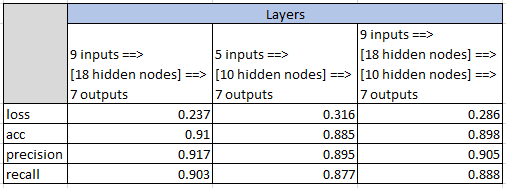


# 6. Test the model



In [13]:
scores = neural_network_classifier.evaluate(test_x, test_y)

for i, m in enumerate(neural_network_classifier.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))


123/123 [==============================] - 1s 4ms/step - loss: 0.2323 - acc: 0.9122 - precision: 0.9164 - recall: 0.9064 - true_negatives: 23190.0000 - true_positives: 3552.0000 - false_negatives: 367.0000 - false_positives: 324.0000

loss: 0.232

acc: 0.912

precision: 0.916

recall: 0.906

true_negatives: 23190.000

true_positives: 3552.000

false_negatives: 367.000

false_positives: 324.000


## 7. Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.



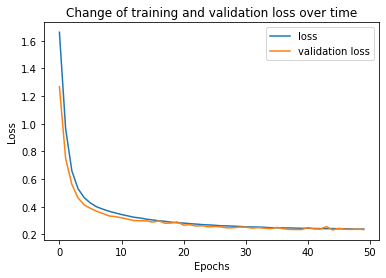

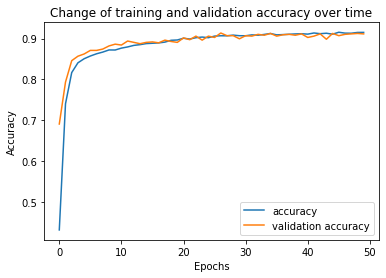

In [14]:
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Change of training and validation loss over time")
plt.show()

plt.plot(history.history["acc"], label = "accuracy")
plt.plot(history.history["val_acc"], label = "validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Change of training and validation accuracy over time")
plt.show()

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.



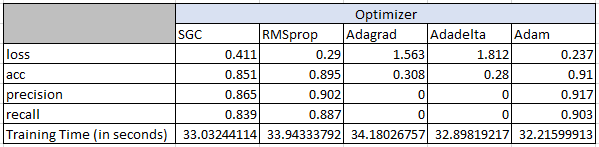

The <B>DL Model with ADAM as optimizer</B> seems to be best fit model as compared to others

The Model is not underfitting

The Model is not overfitting

The features selected are optimal to predict the class of the Beans 

The model is not complex

The model is not very resource intensive

The model is not very large/heavy

The model performance is good


<B>We drop Duplicates from the dataset</B>

data = data.drop_duplicates()


<B>To encode categorical data Encode target labels with value between 0 and n_classes-1</B>

dataDL=data

LE = LabelEncoder()

dataDL['code'] = LE.fit_transform(data['Class'])



<B>MinMax normalize</B> all numeric columns
Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. The great difference in the scale of the numbers could cause problems when attempted to combine the values as features during modeling.


cols = data.select_dtypes(np.number).columns
data[cols] = minmax_scale(data[cols])



<B>Multiclass classification</B> : Need to encode the target labels and transform them in a categorical form. The output variable contains Seven different string values.

When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to a matrix with a Boolean for each class value and whether a given instance has that class value or not.

This is called <B>one-hot encoding</B> or creating dummy variables from a categorical variable.


<B>Small Dataset</B> Data plays an important role in Machine learning and Deep learning. More the data, more training and more Testing and better quality Model

<B>Data Quality</B> Data Quality plays important role in Machine learning and Deep learning. Better quality data means (less data missing values, minimum duplicates, Clean data, etc.) means better model.

<B>Data Observation</B>

Area is right skewed bit lot of max outliers

Area has few extreme values

Perimeter is right-skewed 

Perimeter has lot of outliers 

Perimeter : : Few data points have significantly higher values

Major Axis Length is right-skewed data with max outliers

Major Axis Length : Few data points have significantly higher values

Minor Axis Length is right-skewed data with max outliers

Minor Axis Length : Few data points have significantly higher values

Eccentricity is left-skewed with minimum outliers

Eccentricity : Few data points have significantly lesser values

EquivDiameter is right-skewed data

Extent is left-skewed data

Compactness is normally distributed

Shapefactor 1 is normally distributed with min and max outliers

ShapeFactor 2 is normally distributed without any outliers

ShapeFactor 4 is extremely left skewed with minimum outliers

Comparing to ShapeFactor 3, 2, and 1 we can observe ShapeFactor 4 is extremely skewed

Most of the attributes are skewed

Some attributes having significantly higher or lower values

BOMBAY having higher Area, follwed by Cali and Barbunya. Least Area is for Dermason and Seker

Bombay having higher Perimeter, followed by Barbunya and Cali. Least Perimeter is for Dermason and Seker

Bombay having higher Major Axis Length followed by Calia and Barbunya, least Major Axis Length is for Dermason and Seker

Bombay having higher Minor Axis values, followed by Barbuya and Cali, least being Dermason

ShapeFactor 2 and 3 merely have the same trend

Some features have correlation = 1 with each other so we can safely drop one of them

	ConvexArea and Area
	ShapeFactor 3 and Compactness
    
Some feature have correlation almost equal to -1 (-0.99,-0.98) , we can also choose to drop one of them or take pca

	AscpectRatio and Compactness
	AscpectRatio and ShapeFactor 3
	MajorAxisLength and Perimeter
	Perimeter and Area
	EquivDiameter and Area
	EquivDiameter and Perimeter
	Eccentricity and ShapeFactor 3
    
    
    
Some feature are able to strongly identify some classes

ShapeFactor 1 of Bombay type is always less than 0.004 anything else is higher

Eccentricity is able to distinguish beans of type SEKER and of type HOROZ

Also some types have flat curve for specific features which means that we could not use this feature to identify them like the feature Extent with type HOROZ